In [1]:
# Linear Regression on property price

In [31]:
import pandas as pd
pp = pd.read_csv("E:\DATA scientist\R\Property price\Property_Price_Train.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)
pp.isnull().sum()

Id                              0
Building_Class                  0
Zoning_Class                    0
Lot_Extent                    259
Lot_Size                        0
Road_Type                       0
Lane_Type                    1368
Property_Shape                  0
Land_Outline                    0
Utility_Type                    0
Lot_Configuration               0
Property_Slope                  0
Neighborhood                    0
Condition1                      0
Condition2                      0
House_Type                      0
House_Design                    0
Overall_Material                0
House_Condition                 0
Construction_Year               0
Remodel_Year                    0
Roof_Design                     0
Roof_Quality                    0
Exterior1st                     0
Exterior2nd                     0
Brick_Veneer_Type               8
Brick_Veneer_Area               8
Exterior_Material               0
Exterior_Condition              0
Foundation_Typ

In [32]:
pp.columns[ pp.isnull().sum()*100/ pp.shape[0] > 40]

Index(['Lane_Type', 'Fireplace_Quality', 'Pool_Quality', 'Fence_Quality',
       'Miscellaneous_Feature'],
      dtype='object')

In [33]:
pp = pp.drop(["Id",'Lane_Type', 'Fireplace_Quality', 'Pool_Quality', 'Fence_Quality',
       'Miscellaneous_Feature'], axis = 1)

In [34]:
pp.shape

(1459, 75)

In [35]:
pp.Basement_Height.fillna('TA' , inplace = True)
pp.Exposure_Level.fillna('No' , inplace = True)
pp.BsmtFinType1.fillna('Unf' , inplace = True)
pp.BsmtFinType2.fillna('Unf' , inplace = True)
pp.Electrical_System.fillna('SBrkr' , inplace = True)
pp.Garage.fillna('Attchd' , inplace = True)
pp.Garage_Finish_Year.fillna('Unf' , inplace = True)
pp.Garage_Quality.fillna('TA' , inplace = True)
pp.Garage_Condition.value_counts()
pp.Basement_Condition.fillna('TA' , inplace = True)
pp.Lot_Extent.fillna(pp.Lot_Extent.mean() , inplace = True)
pp.Garage_Built_Year.fillna(pp.Garage_Built_Year.mean()  , inplace = True)
pp.Garage_Condition.fillna("TA" ,inplace = True)
pp.Brick_Veneer_Type.fillna("None" , inplace =True)
pp.Brick_Veneer_Area.fillna(pp.Brick_Veneer_Area.mean() , inplace = True)

In [36]:
pp.isnull().sum()

Building_Class               0
Zoning_Class                 0
Lot_Extent                   0
Lot_Size                     0
Road_Type                    0
Property_Shape               0
Land_Outline                 0
Utility_Type                 0
Lot_Configuration            0
Property_Slope               0
Neighborhood                 0
Condition1                   0
Condition2                   0
House_Type                   0
House_Design                 0
Overall_Material             0
House_Condition              0
Construction_Year            0
Remodel_Year                 0
Roof_Design                  0
Roof_Quality                 0
Exterior1st                  0
Exterior2nd                  0
Brick_Veneer_Type            0
Brick_Veneer_Area            0
Exterior_Material            0
Exterior_Condition           0
Foundation_Type              0
Basement_Height              0
Basement_Condition           0
Exposure_Level               0
BsmtFinType1                 0
BsmtFinS

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [38]:
pp[pp.select_dtypes(include = ['object']).columns] = pp[pp.select_dtypes(include = ['object']).columns].apply(le.fit_transform)

In [39]:
pp.head(5)

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,4,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,7,0,2,2003.0,1,2,1085.793744,4,4,2,163.788080,69.596115,20.337934,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,4,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,7,1,2,1976.0,1,2,196.316304,4,4,2,198.900074,74.716033,15.039392,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,4,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,7,1,2,2001.0,1,2,218.068403,4,4,2,26.127533,32.085268,-46.232198,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,4,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,7,1,6,1998.0,2,3,696.996439,4,4,2,46.948018,40.181415,60.921821,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,4,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,7,1,2,2000.0,1,3,568.859882,4,4,2,-10.626105,20.755323,21.788818,0,0,0,0,12,2008,8,4,250000


In [40]:
pp_x = pp.iloc[:,1:-1]
pp_y = pp.iloc[:,-1]
from sklearn.model_selection import train_test_split
pp_x_train,pp_x_test,pp_y_train,pp_y_test = train_test_split(pp_x,pp_y,test_size = 0.2)

In [41]:
print (pp_x_train.shape, pp_y_train.shape)

(1167, 73) (1167,)


In [42]:
print (pp_x_test.shape, pp_y_test.shape)

(292, 73) (292,)


In [43]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [44]:
reg.fit(pp_x_train,pp_y_train)

LinearRegression()

In [45]:
Rsquare = reg.score(pp_x_train,pp_y_train)
Rsquare

0.8497459103742507

In [51]:
pred_train = reg.predict(pp_x_train)
error_train = pred_train - pp_y_train
N = pp_x_train.shape[0]
K = pp_x_train.shape[1]
AdjRsquare = 1 - (1 - Rsquare)*(N - 1)/ (N - K - 1)
AdjRsquare

0.8397106418082125

In [59]:
cols_coeff = pd.DataFrame({("Columns"): pp_x_train.columns, ("Coefficients"): reg.coef_})
cols_coeff.sort_values("Coefficients", ascending = False)

,Columns,Coefficients
19,Roof_Quality,33137.373936
3,Road_Type,24859.653661
57,Garage_Size,10528.385895
14,Overall_Material,10385.739509
8,Property_Slope,5827.345097
53,Fireplaces,5731.879919
44,Underground_Full_Bathroom,5509.473788
15,House_Condition,5404.664595
5,Land_Outline,4702.054709
46,Full_Bathroom_Above_Grade,4376.726013


In [62]:
pred_test = reg.predict(pp_x_test)
error_test = pred_test - pp_y_test

In [63]:
import numpy as np
MSE = np.mean(np.square(   error_test))
MAE = np.mean(np.abs(error_test))
MAPE = np.mean(np.abs(error_test * 100 / pp_y_test))

In [64]:
print("MSE is", MSE, "MAE is", MAE, "MAPE is", MAPE)

MSE is 711162596.5502238 MAE is 18185.14448215234 MAPE is 10.643307583552687


In [65]:
Accuracy = 100 - MAPE
Accuracy

89.35669241644732

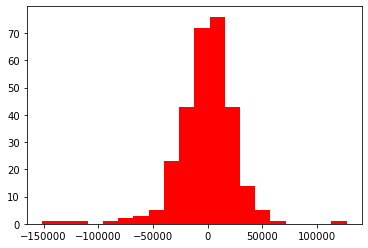

In [70]:
import matplotlib.pyplot as plt
plt.hist(error_test, color = "red", bins = 20);

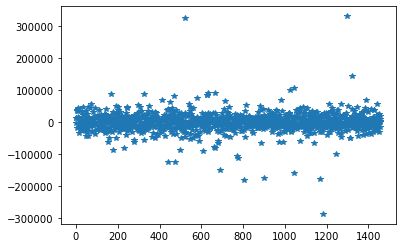

In [73]:
plt.plot(error_train,"*")

In [76]:
pred_actual = pd.DataFrame( {"Actual": pp_y_train, "Predicted": pred_train})
pred_actual.head()

,Actual,Predicted
568,316600,275295.103510
447,199900,222020.427987
12,144000,129700.723033
675,148500,140409.287111
1360,189000,180518.738909


<Figure size 720x720 with 0 Axes>

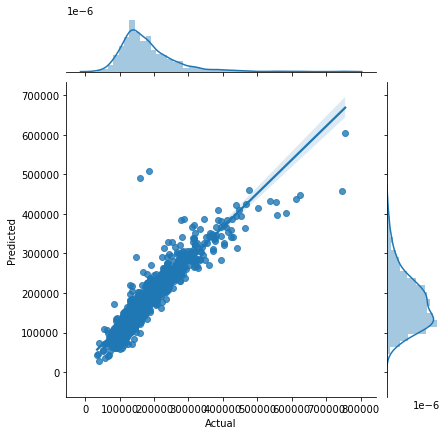

In [77]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.jointplot(x = "Actual", y = "Predicted", kind = "reg", data = pred_actual);